Unit 1 Porfolio Project

Looking to see if number of UFO sightings in the United States from 1960 to 2014 is correlated with box office perfomance of science-fiction movies during the time period



In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.formula.api import ols

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving scrubbed.csv to scrubbed.csv


In [ ]:
ufo = pd.read_csv('scrubbed.csv');

print(ufo.shape)
print(sum(ufo.duplicated()))
print(ufo.isnull().sum())
display(ufo.head())

(80332, 11)
0
datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [ ]:
states = ['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 'nc', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy']
for i in range(len(ufo)):
  if ufo.loc[i]['state'] in states or ufo.loc[i]['country'] == 'us':
    pass
  else:
    ufo.drop(index = i, inplace=True)

ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889


In [ ]:
ufo.isnull().sum()

datetime                   0
city                       0
state                      0
country                 5805
shape                   1731
duration (seconds)         0
duration (hours/min)       0
comments                  13
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [ ]:
import datetime as dt

def fix_datetime_format(date_str):
  if date_str[11:13] == '24' and date_str[2] == '/' and date_str[5] == '/':
    date_str = date_str[0:11] + '00' + date_str[13:]
    return date_str
  elif date_str[10:12] == '24' and date_str[2] == '/' and date_str[4] == '/':
    date_str = date_str[0:10] + '00' + date_str[12:]
    return date_str
  elif date_str[10:12] == '24' and date_str[1] == '/' and date_str[4] == '/':
    date_str = date_str[0:10] + '00' + date_str[12:]
    return date_str
  elif date_str[9:11] == '24' and date_str[1] == '/' and date_str[3] == '/':
    date_str = date_str[0:9] + '00' + date_str[11:]
    return date_str
  else:
    return date_str

ufo['datetime'] = ufo['datetime'].apply(fix_datetime_format)

ufo['datetime'] = pd.to_datetime(ufo['datetime'], infer_datetime_format= True)

ufo['year'] = pd.DatetimeIndex(ufo['datetime']).year

ufo.sort_values(by = 'datetime', ascending = True, inplace = True)

ufo

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year
10580,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056,1910
46858,1910-06-01 15:00:00,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,4/16/2005,32.7091667,-96.008056,1910
46694,1920-06-11 21:00:00,cicero,in,us,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,5/12/2009,40.1238889,-86.013333,1920
20951,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60,1 minute,Young boy witnesses disc in sky above Illinois...,5/11/2005,41.4208333,-90.015000,1925
62760,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60,1min,we were traveling east of burns&#44clmbing up ...,8/16/2002,43.6425000,-118.627500,1929
...,...,...,...,...,...,...,...,...,...,...,...,...
46152,2014-05-07 21:00:00,theodore,al,us,circle,120,few minutes,Driving home and entered my neighborhood and s...,5/8/2014,30.5475000,-88.175278,2014
46153,2014-05-07 21:10:00,naugatuck,ct,us,unknown,300,5 minutes,Large formation of lights in western sky&#44 f...,5/8/2014,41.4858333,-73.051111,2014
46154,2014-05-07 21:20:00,hillsboro,mo,us,fireball,360,4-6 minutes,Round slow moving silent ball looked like a ca...,5/8/2014,38.2322222,-90.562778,2014
46155,2014-05-07 23:30:00,san isidro,nm,NaN,unknown,15,15 seconds,2 red lights gliding across sky&#44 then green...,5/8/2014,35.563363,-106.770591,2014


In [ ]:
ufo_final = ufo['year'].value_counts().rename_axis('year').to_frame('ufo_counts').sort_values(by = 'year').reset_index()
ufo_final = ufo_final.loc[30:][:].reset_index()
ufo_final = ufo_final.drop('index', axis = 1)

In [ ]:
display(ufo_final)

,year,ufo_counts
0,1960,58
1,1961,43
2,1962,66
3,1963,78
4,1964,85
5,1965,178
6,1966,171
7,1967,167
8,1968,200
9,1969,135


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tmdb_movies_data.csv to tmdb_movies_data (1).csv


In [ ]:
movies = pd.read_csv('tmdb_movies_data.csv')
display(movies.head())
movies.drop(['id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'vote_count', 'vote_average'], axis = 1, inplace = True)

movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


,imdb_id,popularity,budget,revenue,original_title,genres,release_date,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015,137999939.3,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/2015,2015,137999939.3,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,3/18/2015,2015,101199955.5,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/2015,2015,183999919.0,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,4/1/2015,2015,174799923.1,1.385749e+09


In [ ]:
print(movies.shape) 
print(movies.dtypes)
print(movies.duplicated().sum())
print(movies.isnull().sum())

(10866, 10)
imdb_id            object
popularity        float64
budget              int64
revenue             int64
original_title     object
genres             object
release_date       object
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object
1
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
genres            23
release_date       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64


In [ ]:
filtered_movies = movies.drop_duplicates()
print(filtered_movies.shape)

genre_drop = filtered_movies[filtered_movies['genres'].isnull() == True]
filtered_movies = filtered_movies.drop(genre_drop.index)

print(filtered_movies.isnull().sum())
print(filtered_movies.shape)

rev_drop = filtered_movies[filtered_movies['revenue'] == 0]
filtered_movies = filtered_movies.drop(rev_drop.index)

filtered_movies = filtered_movies.reset_index()
filtered_movies = filtered_movies.drop('index', axis=1)

print(filtered_movies.isnull().sum())
print(filtered_movies.shape)
filtered_movies

(10865, 10)
imdb_id           8
popularity        0
budget            0
revenue           0
original_title    0
genres            0
release_date      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64
(10842, 10)
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
genres            0
release_date      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64
(4849, 10)


,imdb_id,popularity,budget,revenue,original_title,genres,release_date,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/2015,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,3/18/2015,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/2015,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,4/1/2015,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...
4844,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Drama,6/21/1966,1966,5.038511e+07,2.266436e+08
4845,tt0061107,0.402730,3000000,13000000,Torn Curtain,Mystery|Thriller,7/13/1966,1966,2.015404e+07,8.733419e+07
4846,tt0061619,0.395668,4653000,6000000,El Dorado,Action|Western,12/17/1966,1966,3.125892e+07,4.030809e+07
4847,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Action|Adventure|Drama|War|Romance,12/20/1966,1966,8.061618e+07,1.343603e+08


In [ ]:
display(filtered_movies.describe())
#numbers check out for revenue and adjusted revenue, although the min revenue is $2 for one title

,popularity,budget,revenue,release_year,budget_adj,revenue_adj
count,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4.849000e+03,4.849000e+03
mean,1.045202,2.956961e+07,8.923886e+07,2000.919777,3.516208e+07,1.151009e+08
std,1.356752,4.051761e+07,1.620801e+08,11.569650,4.376117e+07,1.988557e+08
min,0.001117,0.000000e+00,2.000000e+00,1960.000000,0.000000e+00,2.370705e+00
25%,0.387740,1.700000e+06,7.732325e+06,1994.000000,2.329409e+06,1.046585e+07
50%,0.680581,1.500000e+07,3.185308e+07,2004.000000,2.032801e+07,4.395666e+07
75%,1.210502,4.000000e+07,9.996575e+07,2010.000000,4.973516e+07,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
def genre_movies(genre):
  temp = filtered_movies
  for i in range(len(filtered_movies)):
    if genre not in temp.loc[i]['genres']:
      temp = temp.drop(index=i)
  temp = temp.sort_values(by = 'release_year')
  return temp

scifi_movies = genre_movies('Science Fiction')
scifi_movies

,imdb_id,popularity,budget,revenue,original_title,genres,release_date,release_year,budget_adj,revenue_adj
4848,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Adventure|Science Fiction,8/24/1966,1966,3.436265e+07,8.061618e+07
4391,tt0063442,1.152937,5800000,33395426,Planet of the Apes,Adventure|Science Fiction|Mystery,2/7/1968,1968,3.635999e+07,2.093547e+08
4401,tt0062794,0.045242,950000,814666,Charly,Drama|Romance|Science Fiction,9/23/1968,1968,5.955515e+06,5.107112e+06
4390,tt0062622,3.309196,12000000,56715371,2001: A Space Odyssey,Science Fiction|Mystery|Adventure,4/5/1968,1968,7.522756e+07,3.555466e+08
4798,tt0065462,0.797231,3000000,18999718,Beneath the Planet of the Apes,Adventure|Science Fiction|Mystery,5/1/1970,1970,1.684911e+07,1.067094e+08
...,...,...,...,...,...,...,...,...,...,...
185,tt2049543,0.429756,0,4505,Synchronicity,Thriller|Mystery|Science Fiction,7/22/2015,2015,0.000000e+00,4.144598e+03
190,tt3395184,0.383406,0,49970,Spring,Horror|Romance|Science Fiction,3/20/2015,2015,0.000000e+00,4.597238e+04
196,tt1817771,0.330968,0,70958,Freaks of Nature,Science Fiction|Comedy|Horror,10/30/2015,2015,0.000000e+00,6.528133e+04
31,tt1823672,3.899557,49000000,102069268,Chappie,Crime|Action|Science Fiction,3/4/2015,2015,4.507998e+07,9.390369e+07


In [ ]:
def genre_rev(genre_movies):
  unique_years = genre_movies['release_year'].unique()
  temp = pd.DataFrame(columns = ['year', 'adj_rev_total'])
  temp['year'] = unique_years
  r_vals = []
  for i in range(len(unique_years)):
    r = scifi_movies.loc[scifi_movies['release_year'] == unique_years[i], 'revenue_adj'].sum()
    r_vals.append(r)
  temp['adj_rev_total'] = r_vals
  return temp

scifi_rev = genre_rev(scifi_movies)
scifi_rev

,year,adj_rev_total
0,1966,8.061618e+07
1,1968,5.700084e+08
2,1970,1.067094e+08
3,1971,8.474945e+08
4,1972,5.058124e+07
5,1973,1.335311e+08
6,1974,3.815252e+08
7,1975,6.600105e+08
8,1976,2.973951e+08
9,1977,4.058969e+09


In [ ]:
from google.colab import files
uplodaded = files.upload()

Saving us population.xlsx to us population.xlsx


In [ ]:
pop = pd.read_excel('us population.xlsx')

pop['Date'] = pd.to_datetime(pop['Date'])
pop['year'] = pd.DatetimeIndex(pop['Date']).year

mil_pop = []
for i in range(len(pop)):
  mil_pop.append(float(pop.loc[i]['Population'][:-8]))
pop['us_pop_mil'] = mil_pop

pop.drop(['Date', 'Population'], axis = 1, inplace = True)

In [ ]:
df_final = pd.merge(ufo_final ,scifi_rev, how = 'left')
df_final = pd.merge(df_final, pop, how = 'left')
df_final = df_final.fillna(0)
df_final['adj_rev_mil'] = df_final['adj_rev_total'] / 1000000
df_final = df_final.loc[:53]
df_final

,year,ufo_counts,adj_rev_total,us_pop_mil,adj_rev_mil
0,1960,58,0.000000e+00,180.67,0.000000
1,1961,43,0.000000e+00,183.69,0.000000
2,1962,66,0.000000e+00,186.54,0.000000
3,1963,78,0.000000e+00,189.24,0.000000
4,1964,85,0.000000e+00,191.89,0.000000
5,1965,178,0.000000e+00,194.30,0.000000
6,1966,171,8.061618e+07,196.56,80.616176
7,1967,167,0.000000e+00,198.71,0.000000
8,1968,200,5.700084e+08,200.71,570.008419
9,1969,135,0.000000e+00,202.68,0.000000


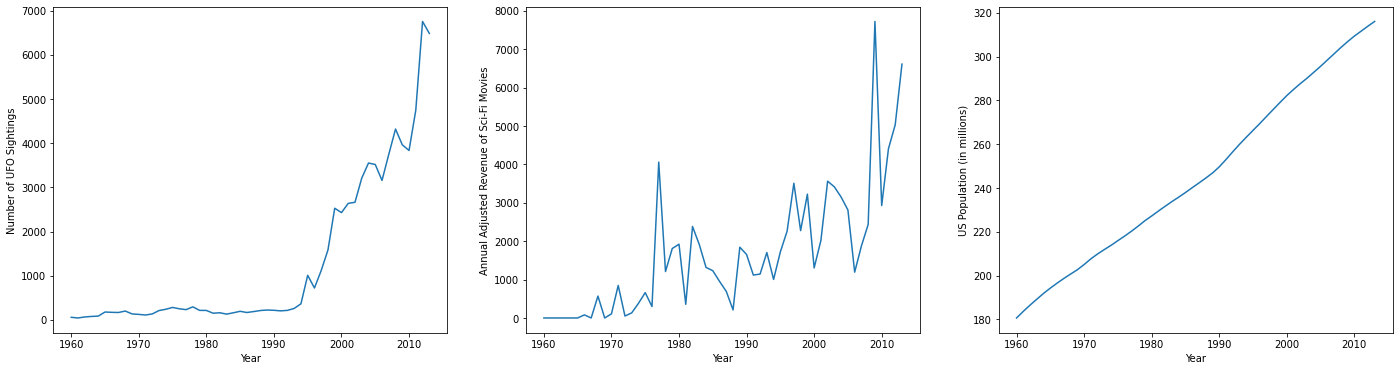

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))

ax1.plot(df_final['year'], df_final['ufo_counts']);
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of UFO Sightings')

ax2.plot(df_final['year'], df_final['adj_rev_mil']);
ax2.set_xlabel('Year')
ax2.set_ylabel('Annual Adjusted Revenue of Sci-Fi Movies')

ax3.plot(df_final['year'], df_final['us_pop_mil']);
ax3.set_xlabel('Year')
ax3.set_ylabel('US Population (in millions)');

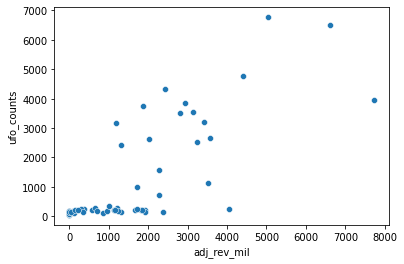

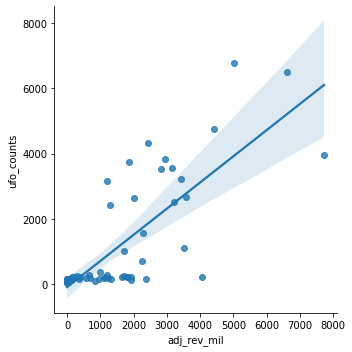

In [ ]:
sns.scatterplot(x=df_final['adj_rev_mil'], y = df_final['ufo_counts']);

sns.lmplot(x = 'adj_rev_mil', y = 'ufo_counts', data = df_final);

In [ ]:
from scipy.stats import pearsonr

pearsonr(df_final['ufo_counts'], df_final['adj_rev_mil'])

(0.7658454064793015, 1.513723281962358e-11)

In [ ]:
model = ols('ufo_counts ~ adj_rev_mil', data = df_final).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ufo_counts   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     73.76
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.51e-11
Time:                        02:55:29   Log-Likelihood:                -455.99
No. Observations:                  54   AIC:                             916.0
Df Residuals:                      52   BIC:                             920.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -85.5602    221.530     -0.386      

In [ ]:
model2 = ols('ufo_counts ~ us_pop_mil + adj_rev_mil', data = df_final).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             ufo_counts   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     74.92
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           6.61e-16
Time:                        02:55:29   Log-Likelihood:                -442.83
No. Observations:                  54   AIC:                             891.7
Df Residuals:                      51   BIC:                             897.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5945.1327   1049.863     -5.663      